In [57]:
import pandas as pd
import seaborn as sns
import numpy as np

Ingestamos todos los datasets a ser explorados y elegir los mas adecuados para realizar un análisis y visualización adecuadas

In [ ]:
Vel_Internet_fijo = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Velocidad media de bajada de Internet fijo por provincia.csv')
DF_Internet1 = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Velocidad_Media_de_bajada_de_Internet_fijo.csv')
Total_Accesos_Internet = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Total nacional de accesos a Internet fijo por banda ancha y banda angosta.csv')
Accesos_Internet1 = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Acceso a Internet Fijo por rangos de velocidad de bajada y provincia.csv')
Accesos_Internet2 = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Acceso a Internet fijo por tecnología y provincia.csv')
Accesos_Internet3 = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Accesos a banda ancha y banda angosta por provincia.csv')
Accesos_Internet4 = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Accesos a Internet fijo por tecnología y localida.csv')
Accesos_Internet5 = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Accesos a Internet fijo por velocidad bajada y provincia.csv')
Accesos_Internet6 = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Accesos a Internet fijo por velocidad de bajada y localidad.csv')
vel_internet_nacional = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Distribución de los accesos totales nacionales a Internet fijo por velocidad.csv')
Ingresos_prestacion_fija = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Ingresos trimestrales por la prestación del servicio de Internet fijo.csv')
Lista_localidades = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Listado de localidades con conectividad a internet.csv')
Penetracion_internet_fija = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Penetración de Internet fijo (accesos por cada 100 hogares).csv')
Serie_trimestral_internet_fijo = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Serie trimestral de accesos a Internet fijo por tecnología.csv')
Penetracion_internet_fija2 = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Penetración por hogares nacional de Internet fijo.csv')

Penetracion_internet_fija = pd.read_csv('/content/drive/MyDrive/PI03_datasets/Penetración de Internet fijo (accesos por cada 100 hogares).csv')
Se explora la cantidad de datos existentes, el tipo y la calidad de éstos usando el método df.info() y df.head(). Luego elegimos los datasets que tienen información a nivel nacional y a nivel provincial que tienen la misma cantidad de registros respectivamente. De esta forma nos quedamos con los siguientes datasets :  'Vel_Internet_fijo', 'Total_Accesos_Internet', 'Accesos_internet1', 'Accesos_internet2', 'Accesos_internet3', 'vel_internet_nacional', 'Ingresos_prestacion_fija', 'Penetracion_internet_fija', 'Serie_trimestral_internet_fijo', 'Penetracion_internet_fija2'.

In [ ]:
Accesos_Internet2['Año'] = Accesos_Internet2['Año'].str.replace('*','')
Accesos_Internet2['Trimestre'] = Accesos_Internet2['Trimestre'].str.replace('*','')
Accesos_Internet2.drop(axis=0, index=792, inplace = True)
Accesos_Internet2['Año'] = pd.to_numeric(Accesos_Internet2['Año'])
Accesos_Internet2['Trimestre'] = pd.to_numeric(Accesos_Internet2['Trimestre'])
Accesos_Internet3['Año'] = pd.to_numeric(Accesos_Internet3['Año'])
Accesos_Internet3['Trimestre'] = pd.to_numeric(Accesos_Internet3['Trimestre'])

se realizan transformaciones con la finalidad de realizar operaciones y unir datasets de forma conveniente

In [ ]:
DF_merged_nacional = pd.merge(Penetracion_internet_fija2,Ingresos_prestacion_fija)
DF_nacional = DF_merged_nacional.drop(['Periodo'], axis = 1)
DF_gen = pd.merge(Total_Accesos_Internet,DF_nacional)
DF_internet_general = DF_gen.drop(['Periodo'],axis=1)

DF_prov = pd.merge(Penetracion_internet_fija,Vel_Internet_fijo)
DF_provincia = pd.merge(DF_prov, Accesos_Internet3)

Finalmente convertimos nuestros dataframes unidos a formato CSV para ser trabajados en Power BI donde ademas se crean tablas de Calendario y Provincias

In [ ]:
Accesos_Internet1.to_csv('Vel_internet_prov.csv', index=False)
Accesos_Internet2.to_csv('Tech_internet.csv', index = False)
DF_provincia.to_csv('DF_prov.csv', index = False)
DF_internet_general.to_csv('DF_nacional.csv',index=False)
vel_internet_nacional.to_csv('velocidad_internet_gen.csv', index=False)

Con estos reducimos nuestro conjunto original de datos a 5 archivos.
Por otro lado, tambien implementamos visualizaciones de Python, código que se muestra a continuación

In [86]:
DF_nacional = pd.read_csv('DF_nacional.csv')
DF_nacional.info()
#ingestamos DF adecuado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           33 non-null     int64  
 1   Trimestre                     33 non-null     int64  
 2   Banda ancha fija              33 non-null     object 
 3   Dial up                       33 non-null     float64
 4   Total                         33 non-null     object 
 5   Accesos por cada 100 hogares  33 non-null     object 
 6   Accesos por cada 100 hab      33 non-null     object 
 7   Ingresos (miles de pesos)     33 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.2+ KB


In [87]:
DF_nacional['Ingresos (miles de pesos)']=DF_nacional['Ingresos (miles de pesos)'].str.replace('.','')
DF_nacional['Ingresos (miles de pesos)']=pd.to_numeric(DF_nacional['Ingresos (miles de pesos)'])
anios = [2019,2020,2021]
#Realizamos transformaciones necesarias

C:\Users\HP\AppData\Local\Temp\ipykernel_15028\2388099908.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  DF_nacional['Ingresos (miles de pesos)']=DF_nacional['Ingresos (miles de pesos)'].str.replace('.','')


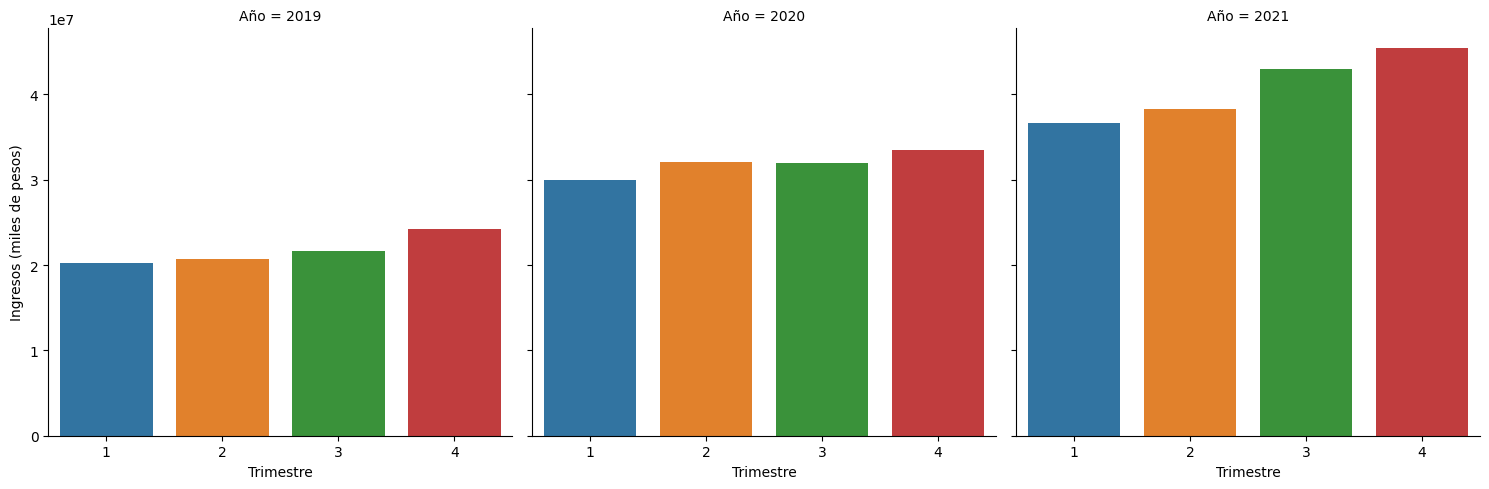

In [93]:
Filtro =  (DF_nacional['Año'].isin(anios)) #& (DF_nacional['Ingresos (miles de pesos)'] < 1000000)
sns.catplot(x= 'Trimestre', y = 'Ingresos (miles de pesos)', col='Año', kind="bar",  data = DF_nacional[Filtro])
# se definen filtros y se grafica un diagrama de barras

A continuación se realiza lo mismo para generar un diagrama de boxplots

In [41]:
DF_prov=pd.read_csv('DF_prov.csv')
Provincias = ['Buenos Aires', 'Córdoba', 'Santa Fe']
anios = [2019,2020,2021]

In [42]:

DF_prov['Accesos por cada 100 hogares']=DF_prov['Accesos por cada 100 hogares'].str.replace(',','.')
DF_prov['Accesos por cada 100 hogares']=pd.to_numeric(DF_prov['Accesos por cada 100 hogares'])
DF_new = DF_prov[DF_prov['Año'].isin(anios)]

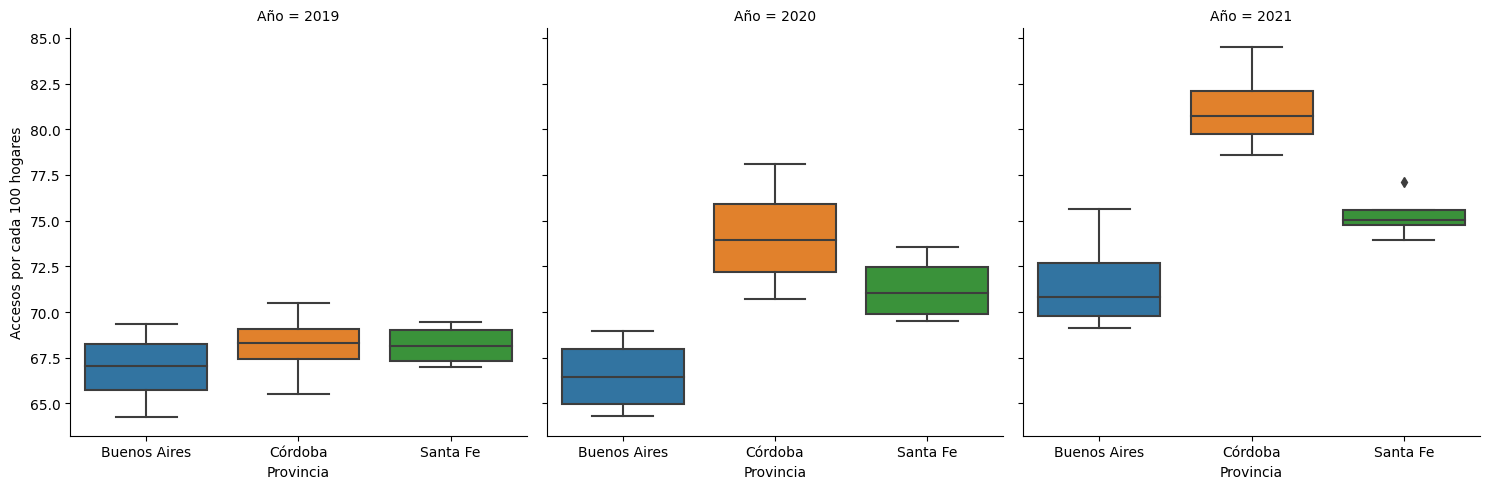

In [44]:
Filtro = (DF_prov['Provincia'].isin(Provincias)) & (DF_prov['Año'].isin(anios))
sns.catplot(x= 'Provincia', y = "Accesos por cada 100 hogares", col='Año', kind="box",  data = DF_prov[Filtro])